In [42]:
import pandas as pd

df = pd.read_csv("dataset.csv")
df.head()

,idade,gênero,imc,filhos,fumante,região,encargos
0,18,Masculino,26,2,Não,Centro-Oeste,477.770040
1,53,Masculino,29,3,Não,Nordeste,5782.041990
2,30,Masculino,34,2,Sim,Centro-Oeste,2572.503648
3,52,Feminino,37,3,Não,Centro-Oeste,2133.386344
4,34,Feminino,40,0,Não,Sul,5400.705114


Corrigindo Colunas Categoricas como Label Encoder

In [43]:
from sklearn.preprocessing import LabelEncoder

# Inicializando LabelEncoder
le = LabelEncoder()

# Aplicando LabelEncoder em variáveis categóricas
df['gênero'] = le.fit_transform(df['gênero'])
df['fumante'] = le.fit_transform(df['fumante'])
df['região'] = le.fit_transform(df['região'])


Histograma para verificar a dispersao dos dados

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'gênero'}>,
        <Axes: title={'center': 'imc'}>],
       [<Axes: title={'center': 'filhos'}>,
        <Axes: title={'center': 'fumante'}>,
        <Axes: title={'center': 'região'}>],
       [<Axes: title={'center': 'encargos'}>, <Axes: >, <Axes: >]],
      dtype=object)

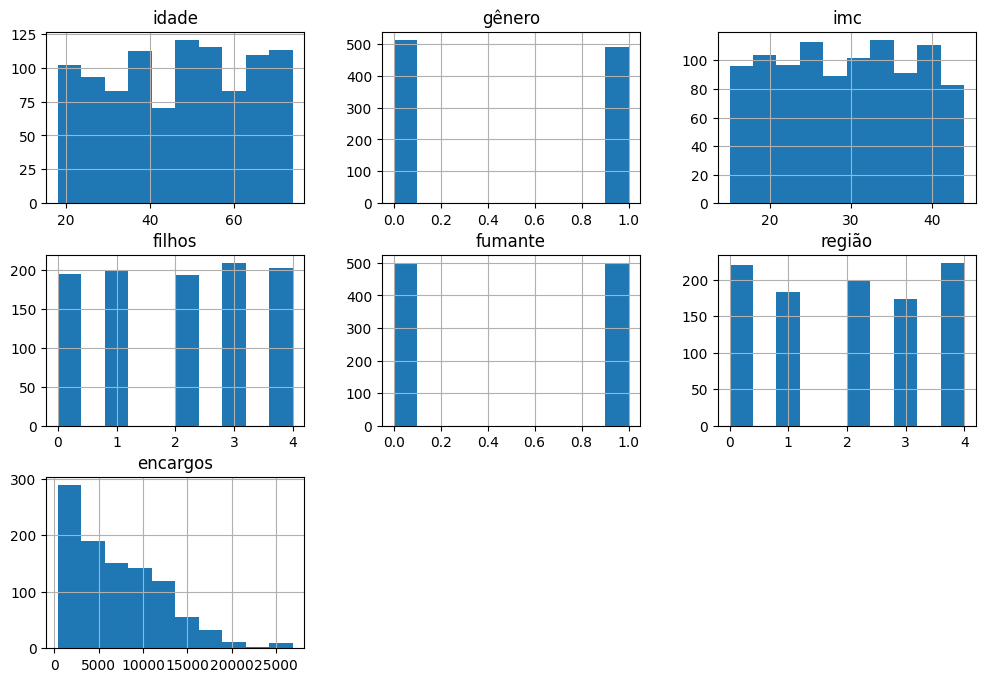

In [44]:
df.hist(figsize=(12,8))

Analisar a coluna Encargos separadamente

<Axes: xlabel='encargos'>

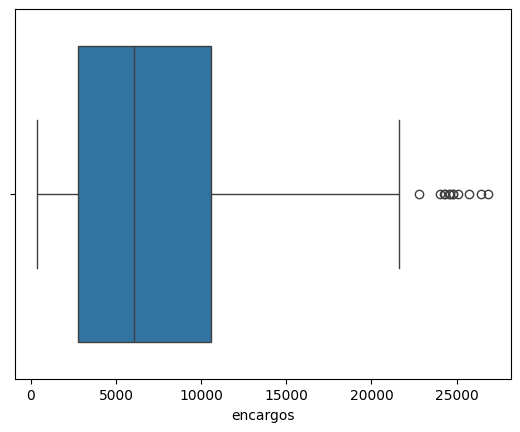

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
# Visualização da matriz de correla

sns.boxplot(data=df, x=df['encargos'])

Matriz de Correlaçao para verificar as correlaçoes entre as colunas

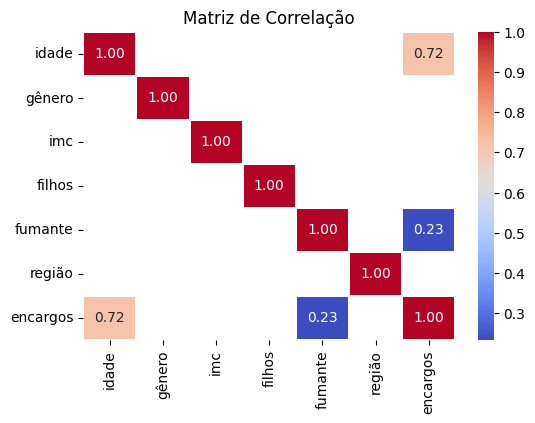

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
# Visualização da matriz de correlação

matriz_corr = df.corr()

# Criando uma máscara para ocultar valores menores ou iguais a media
mask = matriz_corr <= matriz_corr.mean().mean()

# Aplicando a máscara à matriz de correlação
matriz_corr_filtrada = matriz_corr.mask(mask)


plt.figure(figsize=(6, 4))
sns.heatmap(matriz_corr_filtrada, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.2)
plt.title('Matriz de Correlação')
plt.show()

Aplicando OneHotEncoder na coluna região

In [47]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

# Aplicando OneHotEncoder na coluna 'região'
region_encoded = encoder.fit_transform(df[['região']])
region_encoded_dense = region_encoded.toarray()
region_encoded_df = pd.DataFrame(region_encoded_dense, columns=encoder.get_feature_names_out(['região']))
df_encoded = pd.concat([df, region_encoded_df], axis=1).drop('região', axis=1)

df_encoded.head()
df = df_encoded

Separando a coluna Target 

In [48]:
y = df['encargos']
x = df.drop('encargos', axis=1)


Normalizando e Separando as bases em treino e teste

In [49]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



colunas= ['idade','gênero', 'imc', 'filhos', 'fumante']

scaler = MinMaxScaler()
scaler.fit(x)

pipeline = ColumnTransformer([
    ('valores nulos', SimpleImputer(strategy="median"), colunas),   
    ('padronizacao da escala', scaler, colunas)
])

"""
Limpando as bases e traino e testes separadamente para evitar vies
"""
X_train = pipeline.fit_transform(X_train)
X_test  = pipeline.fit_transform(X_test)



Definindo calculo de mape

In [50]:
import numpy as np
def calculate_mape(labels, predictions):
    errors = np.abs(labels - predictions)
    relative_errors = errors / np.abs(labels)
    mape = np.mean(relative_errors) * 100
    return mape

Definindo impressao da analise

In [51]:

# Importando as bibliotecas necessárias
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
# Avaliando o desempenho do modelo
def imprimaAnalise(label, predict):
    erro_medio_quadratico = mean_squared_error(label, predict)
    erro_absoluto_medio = mean_absolute_error(label, predict)
    r_quadrado = r2_score(label, predict)
    mape = calculate_mape(label, predict)
    lin_mse = mean_squared_error(label, predict)
    lin_rmse = np.sqrt(lin_mse) # raiz quadrada aqui
    lin_rmse

    print(f"Erro Médio Quadrático: {erro_medio_quadratico:.4f}")
    print(f"Erro Absoluto Médio: {erro_absoluto_medio:.4f}")
    print(f"R² (coeficiente de determinação): {r_quadrado:.4f}")

    print(f"O MAPE(média abs do percentual de erro ) é: {mape:.4f}%")
    print(f"O MSE (erro médio) é: {lin_rmse:.2f}")

    

    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(label)), label, color='blue', alpha=0.5, label='Valores reais')  # Pontos azuis para os valores reais
    plt.scatter(range(len(predict)), predict, color='red', alpha=0.5, label='Valores previstos')  # Pontos vermelhos para as previsões

    plt.title('Gráfico de dispersão entre valores reais e previstos com cores diferentes')
    plt.xlabel('Índice')
    plt.ylabel('Valores')
    plt.legend()  # Adiciona uma legenda para diferenciar
    plt.grid(True)
    plt.show()

Testando Regressao Linear

Regressao Linear
Erro Médio Quadrático: 12858141.1459
Erro Absoluto Médio: 2627.2511
R² (coeficiente de determinação): 0.5923
O MAPE(média abs do percentual de erro ) é: 62.2517%
O MSE (erro médio) é: 3585.83


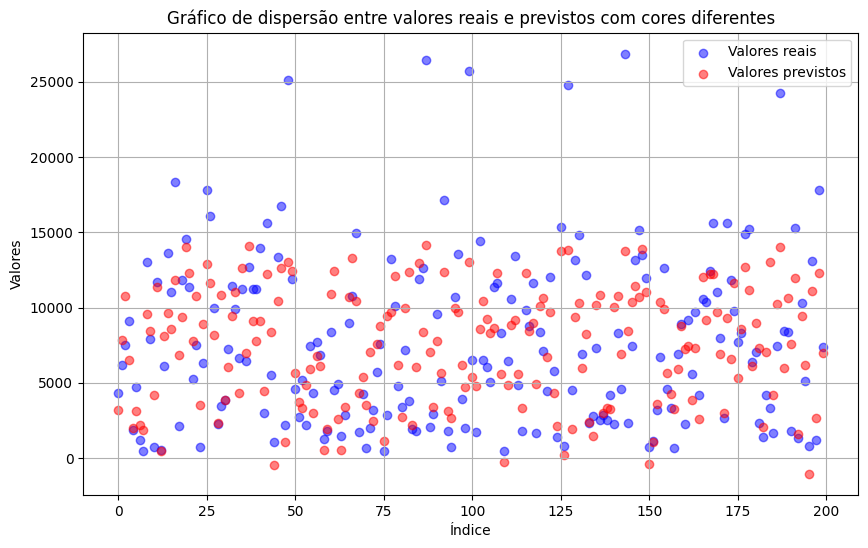

In [52]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
previsoes = model.predict(X_test)
print("Regressao Linear")
imprimaAnalise(y_test, previsoes)

Testando arvore de decisao

Arvore de Decisao
Erro Médio Quadrático: 1475000.6790
Erro Absoluto Médio: 687.6266
R² (coeficiente de determinação): 0.9532
O MAPE(média abs do percentual de erro ) é: 10.3192%
O MSE (erro médio) é: 1214.50


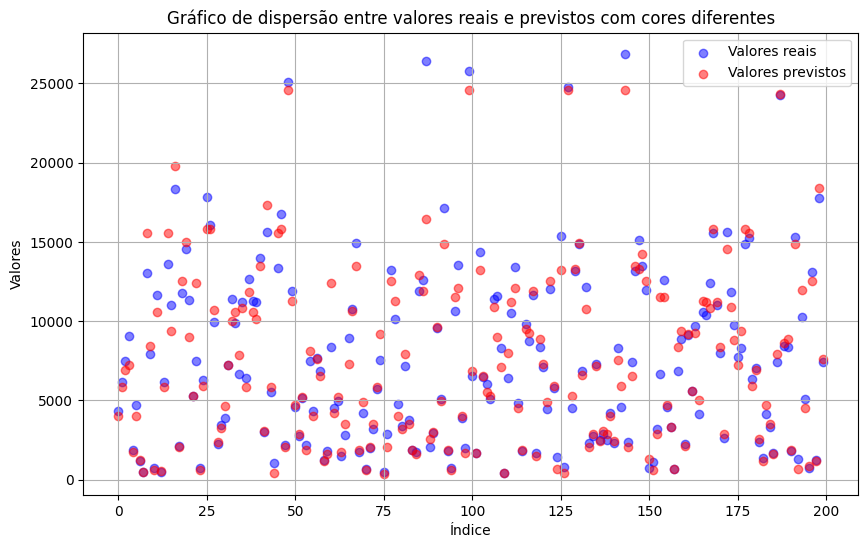

In [53]:
from sklearn.tree import DecisionTreeRegressor

model_tr = DecisionTreeRegressor(max_depth=10)
model_tr.fit(X_train, y_train)
previsoes_tr = model_tr.predict(X_test)
print("Arvore de Decisao")
imprimaAnalise(y_test, previsoes_tr)
